Este colab fue desarrollado por Arnold Charry Armero.

# El Modelo EOQ con faltantes (Economic Order Quantity)

El Modelo EOQ con faltantes es una extensión entre el modelo EOQ original y el modelo EPQ original. Lo que diferencia y hace único a este modelo es que toma una tasa de reabastecimiento infinita, por lo que la tasa de producción se elimina. Adicionalmente, se mantienen los faltantes del EPQ y haciendo uso de límites al infinito se puede obtener una nueva expresión matemática que permite hacer análisis en función de un producto, pero incluyendo faltantes.

**Supuestos:**

*   Existe un solo producto en el sistema de inventarios
*   La demanda es uniforme y determinística
*   Se permiten faltantes
*   No hay un tiempo de entrega
*   Tasa de reabastecimiento infinita, es decir, toda la cantidad ordenada llega al mismo tiempo.

La geometría del inventario de este modelo es la siguiente,

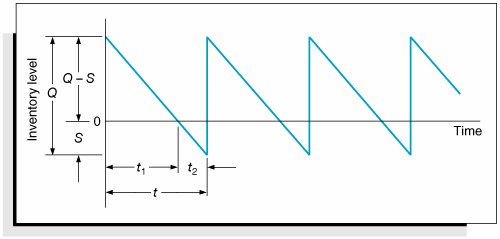

Matemáticamente, el modelo se expresa de la siguiente manera:

$$ K(Q, \:b) = cD + \frac{AD}{Q} +\frac{h \left ( Q - b \right )^{2}}{2Q} + \frac{2\pi bD + \hat{\pi}b^{2}}{2Q}  $$

donde,

$ Q = \mathrm{Cantidad \:de \: lote \: a \: ordenar} $

$ b = \mathrm{Cantidad \:de \: faltantes \: a \: permitir} $

$ c = \mathrm{Costo \: unitario \: de \: producción} $

$ D = \mathrm{Tasa \:de \: demanda} $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ \pi = \mathrm{Costo \:unitario \: de \: faltantes} $

$ \hat{\pi} = \mathrm{Costo \:unitario \: de \: faltantes \: en \: el \: tiempo} $

$ h = \mathrm{Costo \:unitario \: de \: mantener \: en \: inventario} $

$ K = \mathrm{Costo \: total \: promedio} $

Para saber la cantidad óptima de lote a ordenar, se debe derivar parcialmente la función con respecto a $Q$ y $b$ e igualar a 0. De este sistema de ecuaciones se hallan los óptimos. Matemáticamente se expresa esto de la siguiente manera,

$$ \frac{\partial K}{\partial Q} = 0, \frac{\partial K}{\partial b} = 0 $$

Simplificando y despejando $Q$ y $b$,

$$ Q^{*} = \sqrt{\frac{2AD}{h} - \frac{\left ( \pi D \right )^{2}}{h \left ( h+\hat{\pi } \right )}} \sqrt{\frac{h+\hat{\pi }}{\hat{\pi }}} $$

$$ b^{*} = \frac{hQ^{*}-\pi D}{\left ( h + \hat{\pi } \right )} $$

Estas formulas nos indican cuánto se debe ordenar y cuántos faltantes tener con el fin de minimizar los costos de inventario. Para efectos de practicidad, se utilizará Python para resolver ejercicios. Ahora se continua con la implementación en código resolviendo el siguiente ejemplo.

**Ejemplo 6-5. EOQ con faltantes.** Jane, entre otros productos, vende solventes. La demanda es
muy estable de 500 galones al año. El costo de colocar una orden es $\$50$ y por cada galón Jane paga
$\$2$. El costo de mantenerlo en inventario es $20$% anual. Si la demanda excede el inventario, Jane estima
que habrá dos tipos de costos asociados con la orden atrasada. La pérdida de la buena voluntad es
de $\$0.2$ por unidad faltante y un costo de "contabilidad" de $\$0.2$ por unidad faltante por año. Analice
este problema.

In [ ]:
#Se importan las librerias
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Se definen los parámetros (anualmente).
D = 500
A = 50
c = 2
i = 0.2
h = i * c
Cf = 0.2
Cft = 0.2

In [ ]:
#Se define la función
def K(Q_vector):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q  y la cantidad
  de faltantes b ingresados.

  Args:
    Q: Tamaño de lote seleccionado.
    b: Cantidad de faltantes admitidos

  Returns:
    K: Costo total promedio
  """
  Q = Q_vector[0]
  b = Q_vector[1]
  return c * D + (A * D) / Q + ((h * (Q - b)**2) / (2 * Q)) + (2 * Cf * b * D + Cft * b**2) / (2 * Q)

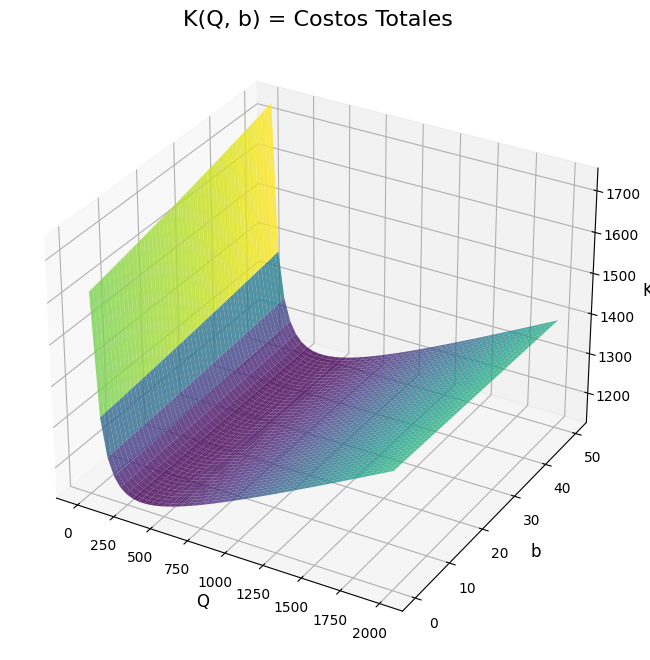

In [ ]:
#Se grafica la función
x = np.linspace(0, 2000)
y = np.linspace(0, 50)

X, Y = np.meshgrid(x, y)
Z = K([X, Y])

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.set_title('K(Q, b) = Costos Totales', fontsize=16)
ax.set_xlabel('Q', fontsize=12)
ax.set_ylabel('b', fontsize=12)
ax.set_zlabel('K', fontsize=12)

plt.show()

Para optimizar, se pueden utilizar dos formas. La primera, es utilizando algoritmos de optimización que sirven para cualquier función. La segunda, es utilizando la formula del $Q^{*}$ y $b^{*}$ optimizado. Para efectos de practicidad, sólo se utilizará la primera.

In [ ]:
#Q inicial para la optimización
q0 = [1000, 50]

#Optimización
result = optimize.basinhopping(K, q0, minimizer_kwargs = {"method": "BFGS"}, niter = 1000)
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 1133.3333333333658
                          x: [ 5.000e+02  1.667e+02]
                        nit: 1000
      minimization_failures: 334
                       nfev: 95811
                       njev: 31310
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 1133.3333333333658
                                    x: [ 5.000e+02  1.667e+02]
                                  nit: 22
                                  jac: [ 0.000e+00  0.000e+00]
                             hess_inv: [[ 2.420e+04  2.449e+04]
                                        [ 2.449e+04  2.487e+04]]
                                 nfev: 114
                                 njev: 38

In [ ]:
#Valor de Q optimizado
optimized_Q = result.x[0]
print("El tamaño de lote debe de ser de {} unidades".format(optimized_Q))

El tamaño de lote debe de ser de 500.00037569489734 unidades


In [ ]:
#Valor de b optimizado
optimized_b = result.x[1]
print("La cantidad de faltantes debe de ser de {} unidades".format(optimized_b))

La cantidad de faltantes debe de ser de 166.66676615322515 unidades


In [ ]:
#Valor de K optimizado - Costo Optimizado
optimized_K = result.fun
print("El costo total minimizado es de ${}".format(optimized_K))

El costo total minimizado es de $1133.3333333333658


También se puede optimizar de otra manera, introduciendo todos los parámetros dentro de la función y luego analizar la parte del costo solamente.

In [ ]:
def EOQ_function_with_shortages(c, D, A, i, Cf, Cft, Q, b):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    c: Costo unitario del producto
    D: Tasa de Demanda
    A: Costo unitario de ordenar
    el producto
    i: Porcentaje de mantener en
    inventario
    Cf: Costo unitario de faltante
    Cft: Costo unitario de faltante
    en el tiempo
    Q: Tamaño de lote seleccionado.
    b: Cantidad de faltantes admitidos
  Returns:
    K: Costo total promedio
  """
  if Q == 0:
    return np.inf
  h = i * c #Costo de mantener el inventario
  return c * D + (A * D) / Q + ((h * (Q - b)**2) / (2 * Q)) + (2 * Cf * b * D + Cft * b**2) / (2 * Q)

print("El costo total minimizado es de ${}".format(EOQ_function_with_shortages(2, 500, 50, 0.2, 0.2, 0.2, 500, 167)))

El costo total minimizado es de $1133.3334


Dejando la función de costo solamente con dos variables de decisión.

In [ ]:
Q_vector = [1000, 30]

def total_cost(Q_vector):
  cost = 0
  Q = Q_vector[0]
  b = Q_vector[1]
  for i in range(0, 1):
    cost += EOQ_function_with_shortages(2, 500, 50, 0.2, 0.2, 0.2, Q, b)
  return cost

In [ ]:
result = optimize.basinhopping(total_cost, Q_vector, minimizer_kwargs = {"method": "BFGS"}, niter = 100)
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 1133.3333333333342
                          x: [ 5.000e+02  1.667e+02]
                        nit: 100
      minimization_failures: 52
                       nfev: 10479
                       njev: 3363
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 1133.3333333333342
                                    x: [ 5.000e+02  1.667e+02]
                                  nit: 17
                                  jac: [ 0.000e+00  0.000e+00]
                             hess_inv: [[ 1.048e+02 -1.044e+02]
                                        [-1.044e+02  1.890e+02]]
                                 nfev: 135
                                 njev: 45

In [ ]:
#Valor de Q optimizado
optimized_Q = result.x[0]
print("El tamaño de lote debe de ser de {} unidades".format(optimized_Q))

El tamaño de lote debe de ser de 499.99996893114 unidades


In [16]:
#Valor de b optimizado
optimized_b = result.x[1]
print("La cantidad de faltantes debe de ser de {} unidades".format(optimized_b))

La cantidad de faltantes debe de ser de 166.66668281439277 unidades


In [17]:
#Valor de K optimizado - Costo Optimizado
optimized_K = result.fun
print("El costo total minimizado es de ${}".format(optimized_K))

El costo total minimizado es de $1133.3333333333342


#### Referencias


* Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Zill, D. G. (2011). Cálculo de varias variables (4a. ed.).